# Hands-on Image Processing with Python
## Chapter 7: Extracting Image Features and Descriptors

### Import libraries

In [6]:
from matplotlib import pylab as pylab
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.color import rgba2rgb
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, SimilarityTransform, AffineTransform, resize
import cv2
import numpy as np
from skimage import data
from skimage.util import img_as_float
from skimage.exposure import rescale_intensity
from skimage.measure import ransac

### Harris Corner Detector

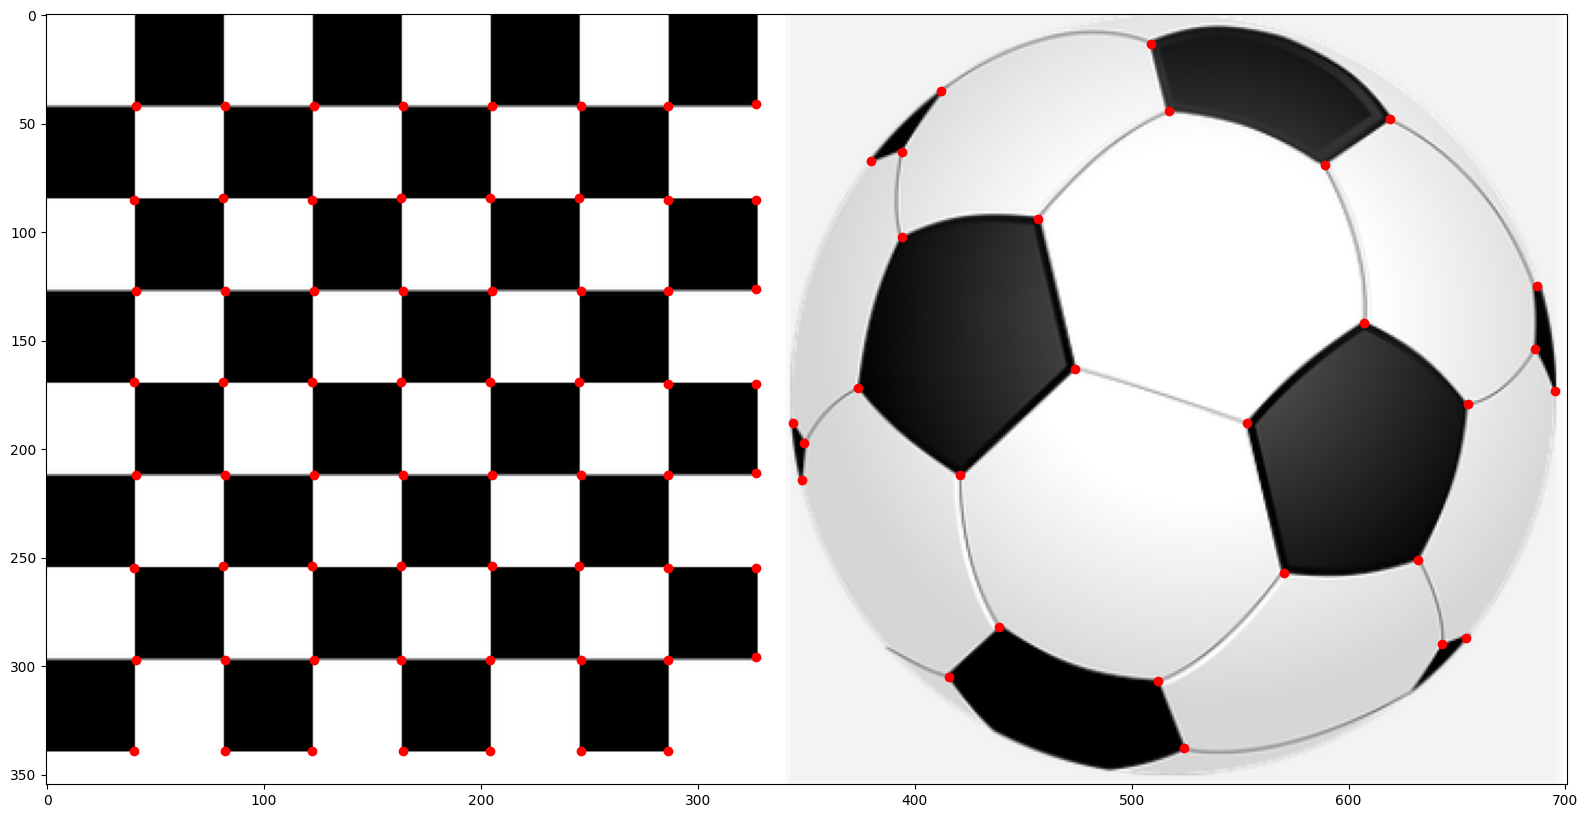

In [23]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import corner_harris, corner_peaks
import matplotlib.pyplot as plt

image = imread('../images/chess_football.png')

# Kiểm tra nếu ảnh có 4 kênh (RGBA), chuyển về 3 kênh (RGB) trước khi chuyển sang grayscale
if image.shape[-1] == 4:
    image = image[:, :, :3]  # Loại bỏ kênh alpha

image_gray = rgb2gray(image)
harris_response = corner_harris(image_gray, k=0.04)
corners = corner_peaks(harris_response, min_distance=5, threshold_rel=0.02)

plt.figure(figsize=(20, 10))
plt.imshow(image, cmap='gray')  # Dùng ảnh gốc để hiển thị (RGB hoặc RGBA)
plt.scatter(corners[:, 1], corners[:, 0], marker='o', color='red', label='Corners')  # Vẽ các điểm góc
plt.show()

### Blob detectors with LoG, DoG and DoH

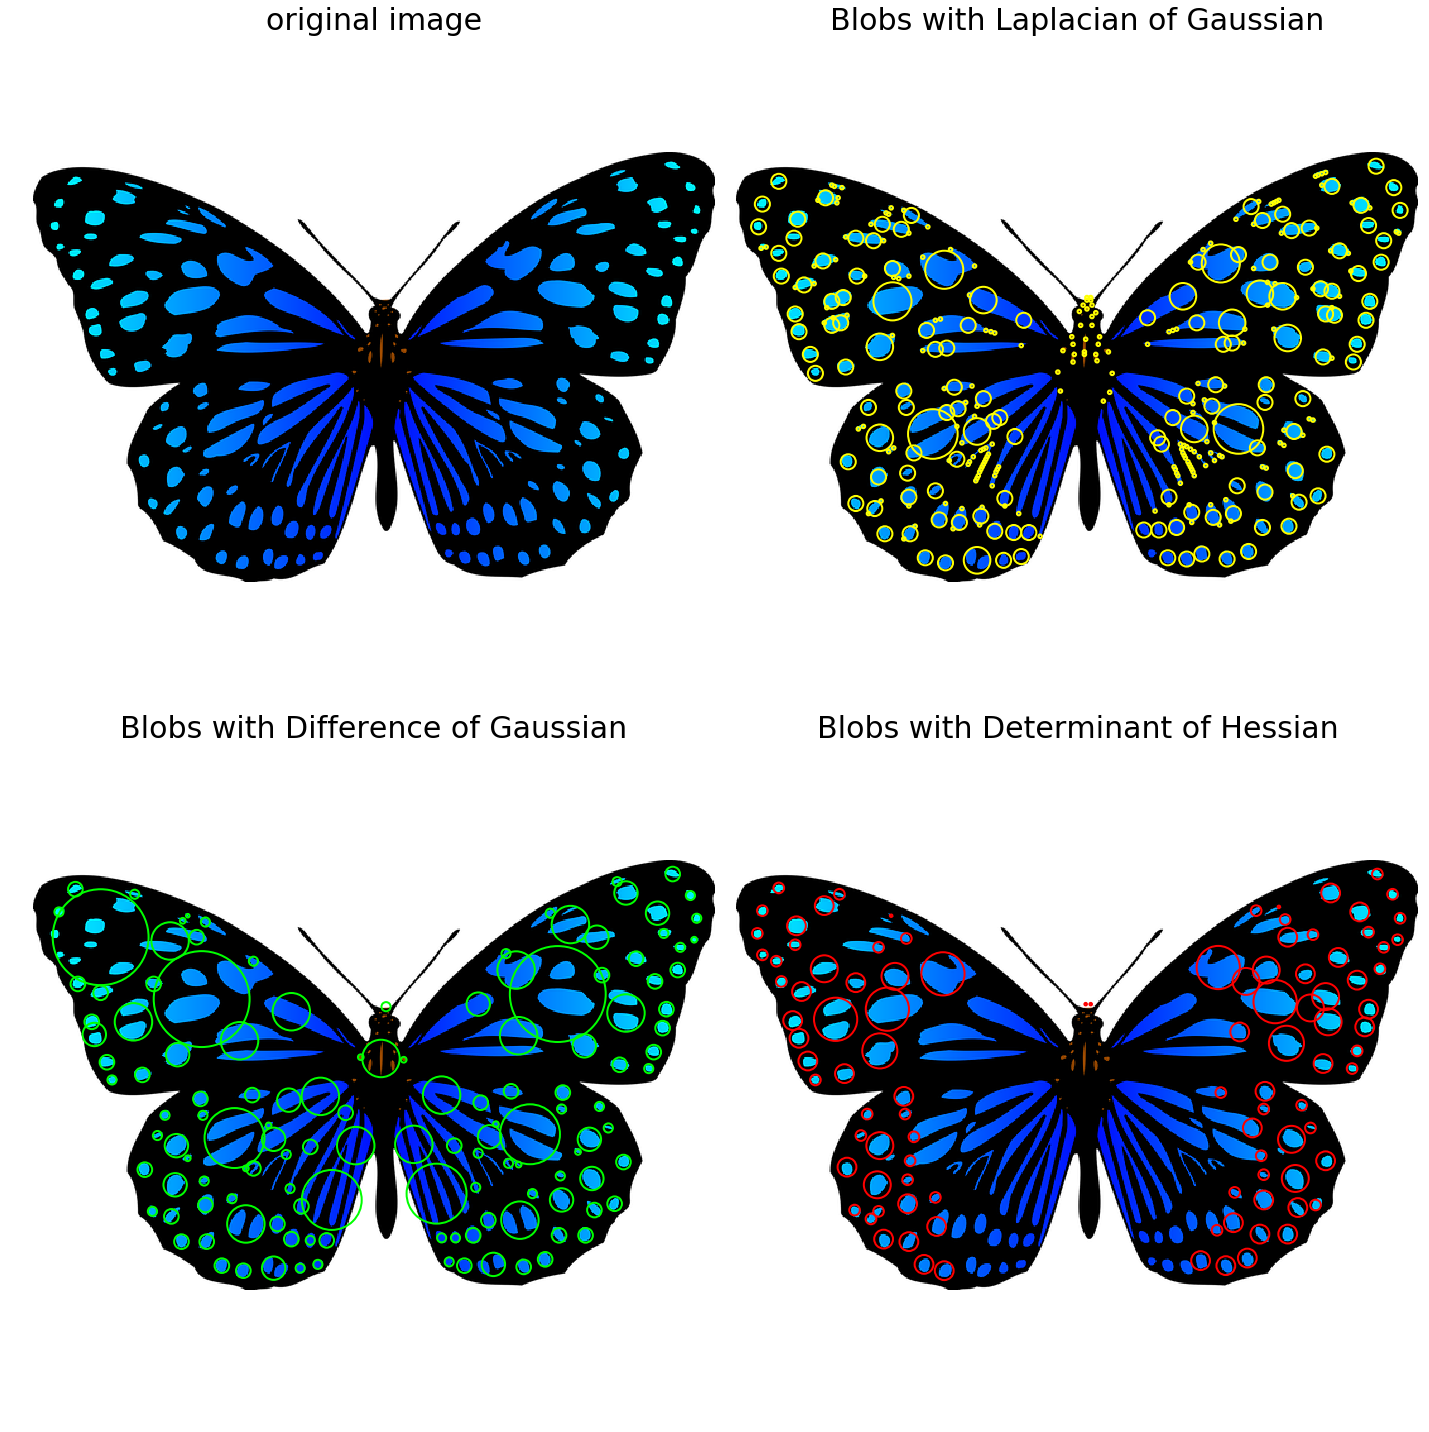

(None, None)

In [ ]:
# 1.  Import thư viện cần thiết
from numpy import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.io import imread
from skimage.color import rgb2gray
from matplotlib import pylab

# 2.  Đọc và xử lý ảnh
im = imread('../images/butterfly.png')
im_gray = rgb2gray(im)

# 3. Phát hiện blob bằng các thuật toán khác nhau
# Laplacian of Gaussian (LoG)
log_blobs = blob_log(im_gray, max_sigma=30, num_sigma=10, threshold=0.1)
log_blobs[:, 2] = sqrt(2) * log_blobs[:, 2]  # Chuyển bán kính thành dạng chuẩn

# Difference of Gaussian (DoG)
dog_blobs = blob_dog(im_gray, max_sigma=30, threshold=0.1)
dog_blobs[:, 2] = sqrt(2) * dog_blobs[:, 2]

# Determinant of Hessian (DoH)
doh_blobs = blob_doh(im_gray, max_sigma=30, threshold=0.005)

# 4. Hiển thị kết quả phát hiện blob
# Danh sách blob, màu và tiêu đề tương ứng
list_blobs = [log_blobs, dog_blobs, doh_blobs]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']
sequence = zip(list_blobs, colors, titles)

# Tạo hình ảnh phụ (subplots)
fig, axes = pylab.subplots(2, 2, figsize=(20, 20), sharex=True, sharey=True)
axes = axes.ravel()

# Hiển thị ảnh gốc
axes[0].imshow(im, interpolation='nearest')
axes[0].set_title('Original Image', size=30)
axes[0].set_axis_off()

# Hiển thị các blob trên ảnh
for idx, (blobs, color, title) in enumerate(sequence):
    axes[idx + 1].imshow(im, interpolation='nearest')
    axes[idx + 1].set_title('Blobs with ' + title, size=30)
    for blob in blobs:
        y, x, radius = blob
        circle = pylab.Circle((x, y), radius, color=color, linewidth=2, fill=False)
        axes[idx + 1].add_patch(circle)
    axes[idx + 1].set_axis_off()

pylab.tight_layout()
pylab.show()

### Compute HOG descriptors with scikit-image

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


(256, 256) 2048


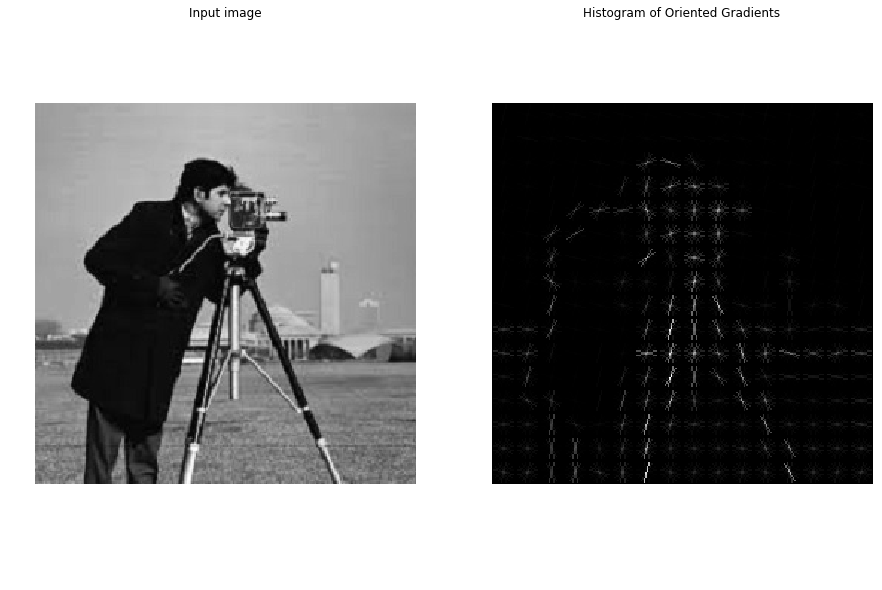

In [ ]:
#1. Import thư viện cần thiết
from skimage.feature import hog
from skimage import exposure
from skimage.color import rgb2gray
from skimage.io import imread
from matplotlib import pylab

# 2. Đọc và xử lý ảnh
# Đọc ảnh và chuyển sang grayscale
image = rgb2gray(imread('../images/cameraman.jpg'))


# 3. Tính toán đặc trưng HOG
# Tính đặc trưng HOG và hình ảnh biểu diễn
fd, hog_image = hog(image, 
                    orientations=8, 
                    pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), 
                    visualize=True)
# In thông tin đầu ra
print(image.shape, len(fd))

# 4.Hiển thị kết quả
# Tạo các subplots
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(15, 10), sharex=True, sharey=True)

# Hiển thị ảnh gốc
axes1.axis('off')
axes1.imshow(image, cmap=pylab.cm.gray)
axes1.set_title('Input Image')

# Hiển thị ảnh HOG
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
axes2.axis('off')
axes2.imshow(hog_image_rescaled, cmap=pylab.cm.gray)
axes2.set_title('Histogram of Oriented Gradients')

# Hiển thị đồ thị
pylab.show()

### Scale-invariant feature transform (SIFT)

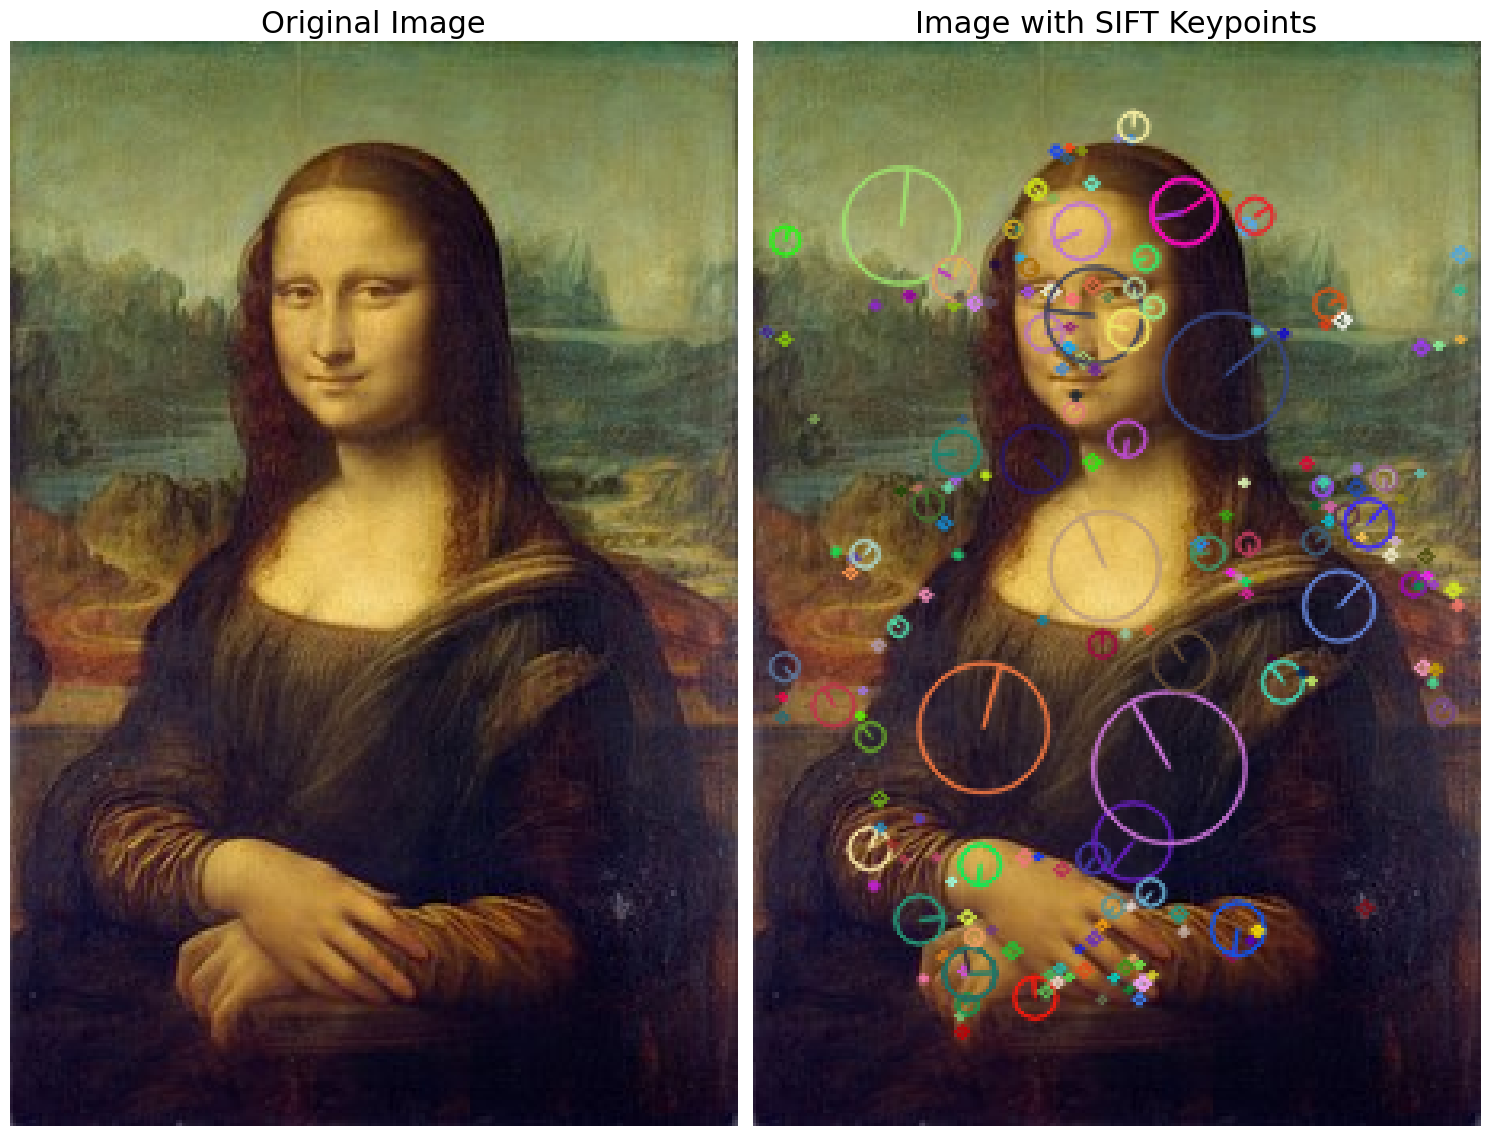

In [4]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv2.imread('../images/monalisa.jpg')
if img is None:
    raise FileNotFoundError("Image not found. Check the path!")

# Chuyển ảnh sang xám
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Tạo đối tượng SIFT và phát hiện keypoints
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)

# Vẽ keypoints trên ảnh
img_with_keypoints = cv2.drawKeypoints(
    img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Hiển thị ảnh gốc và ảnh đã xử lý cạnh nhau
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Chuyển sang RGB
axs[0].set_title("Original Image", fontsize=22)  # Tăng kích thước phụ đề
axs[0].axis("off")

axs[1].imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))  # Chuyển sang RGB
axs[1].set_title("Image with SIFT Keypoints", fontsize=22)  # Tăng kích thước phụ đề
axs[1].axis("off")
plt.tight_layout()
plt.show()

### Binary Robust Independent Elementary Features (BRIEF)

C:\Users\Isha\AppData\Local\Temp\ipykernel_11000\1920629381.py:62: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(axes[0], img1, img2, keypoints1, keypoints2, matches12)
C:\Users\Isha\AppData\Local\Temp\ipykernel_11000\1920629381.py:67: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(axes[1], img1, img3, keypoints1, keypoints3, matches13)


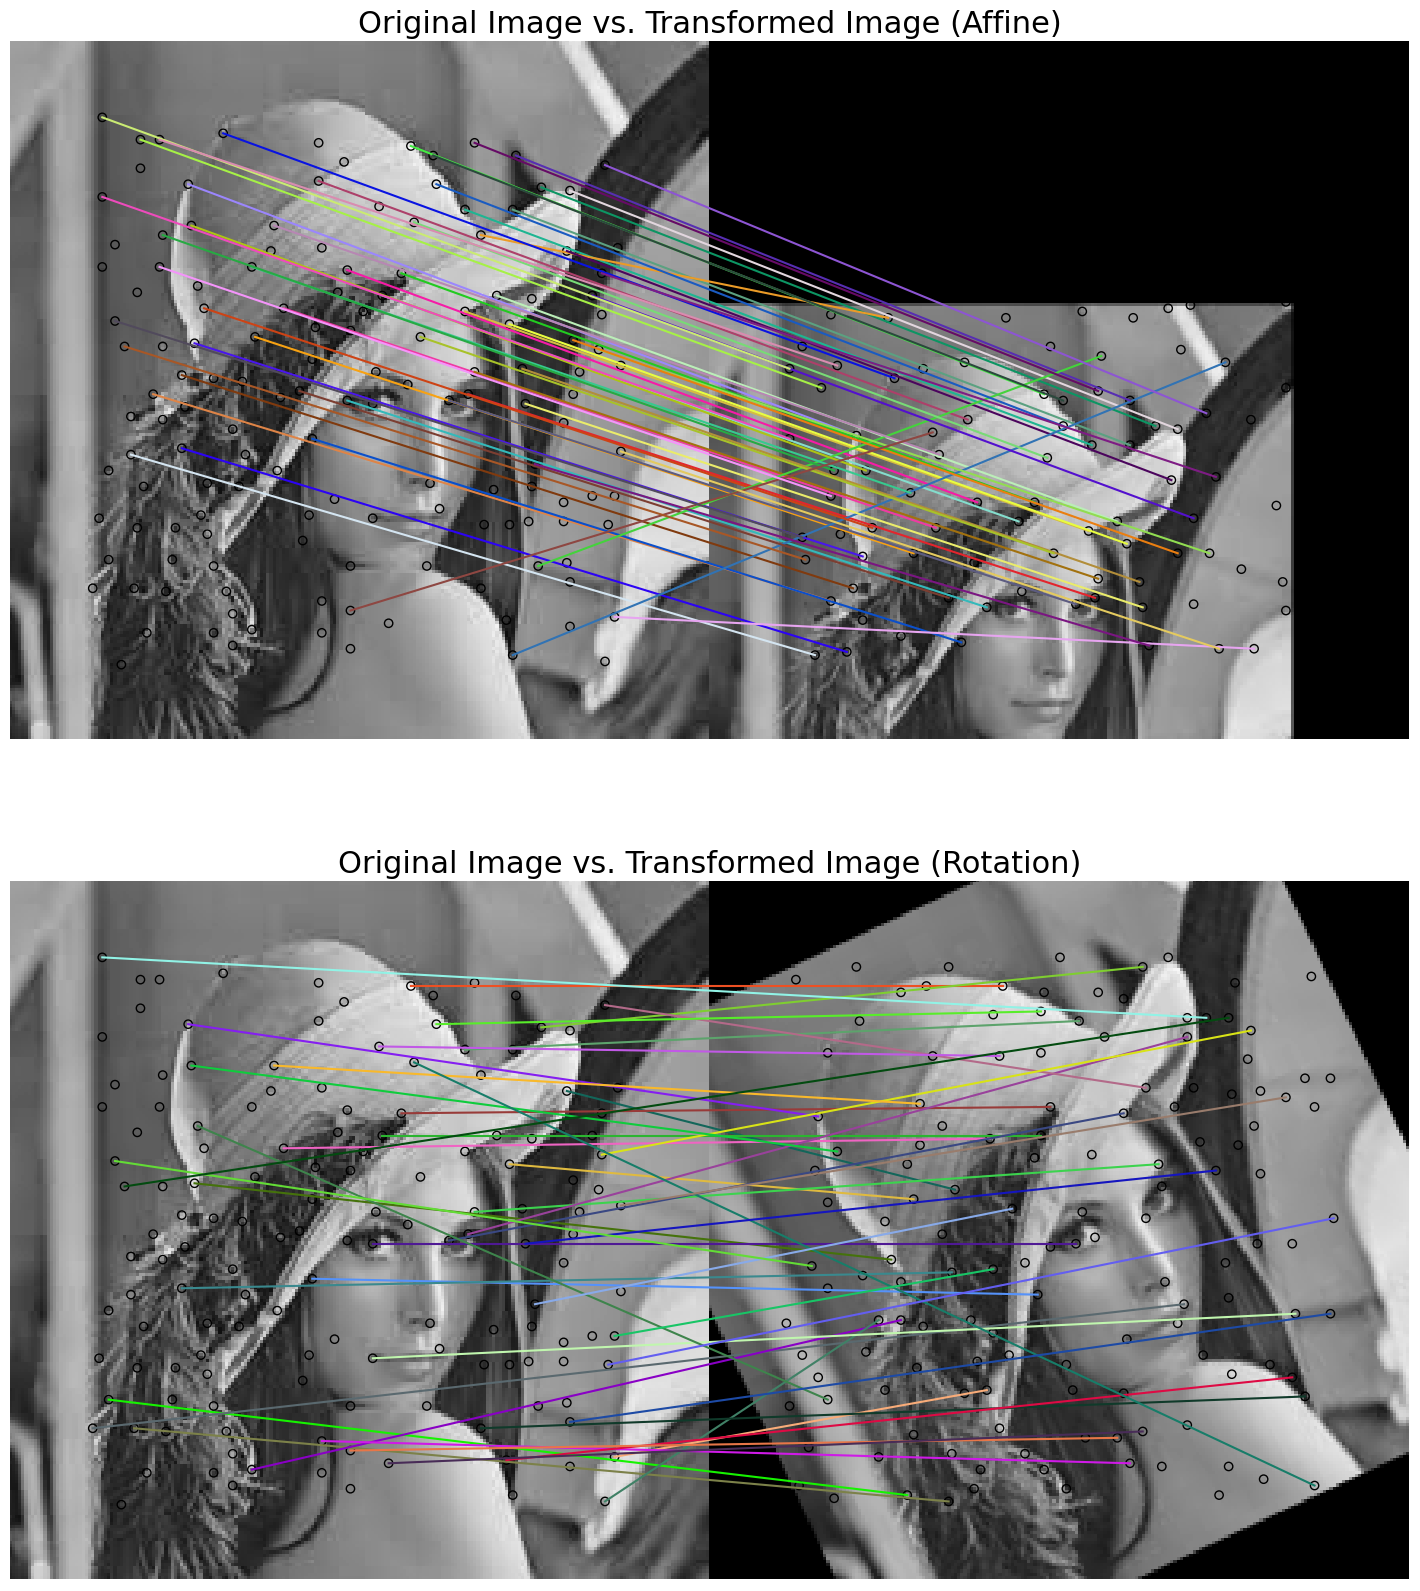

In [5]:

# 1. Import các thư viện cần thiết
from skimage import transform as transform
from skimage.feature import (
    match_descriptors, corner_peaks, corner_harris, plot_matches, BRIEF
)
from skimage.color import rgb2gray
from skimage.io import imread
import matplotlib.pyplot as plt
import pylab

# 2. Chuẩn bị ảnh
# Đọc và chuyển đổi ảnh sang grayscale
img1 = rgb2gray(imread('../images/lena.jpg'))

# Biến đổi Affine: phóng to và dịch chuyển
affine_trans = transform.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img2 = transform.warp(img1, affine_trans)

# Xoay ảnh một góc 25 độ
img3 = transform.rotate(img1, 25)

# 3. Phát hiện keypoints
# Tính toán Corner Harris
coords1, coords2, coords3 = corner_harris(img1), corner_harris(img2), corner_harris(img3)

# Ngưỡng hóa kết quả Corner Harris
coords1[coords1 > 0.01 * coords1.max()] = 1
coords2[coords2 > 0.01 * coords2.max()] = 1
coords3[coords3 > 0.01 * coords3.max()] = 1

# Phát hiện tọa độ các điểm keypoints
keypoints1 = corner_peaks(coords1, min_distance=5)
keypoints2 = corner_peaks(coords2, min_distance=5)
keypoints3 = corner_peaks(coords3, min_distance=5)

# 4. Tính toán descriptors
# Tạo đối tượng BRIEF để trích xuất descriptors
extractor = BRIEF()

# Trích xuất descriptors cho từng ảnh
extractor.extract(img1, keypoints1)
keypoints1, descriptors1 = keypoints1[extractor.mask], extractor.descriptors

extractor.extract(img2, keypoints2)
keypoints2, descriptors2 = keypoints2[extractor.mask], extractor.descriptors

extractor.extract(img3, keypoints3)
keypoints3, descriptors3 = keypoints3[extractor.mask], extractor.descriptors

# 5. So khớp descriptors
# So khớp descriptors giữa ảnh gốc và các ảnh biến đổi
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)


# 6. Hiển thị kết quả
# Hiển thị các kết quả so khớp
fig, axes = pylab.subplots(nrows=2, ncols=1, figsize=(20, 20))
pylab.gray()

# Ảnh gốc vs ảnh biến đổi Affine
plot_matches(axes[0], img1, img2, keypoints1, keypoints2, matches12)
axes[0].axis('off')
axes[0].set_title("Original Image vs. Transformed Image (Affine)", fontsize=22)

# Ảnh gốc vs ảnh xoay
plot_matches(axes[1], img1, img3, keypoints1, keypoints3, matches13)
axes[1].axis('off')
axes[1].set_title("Original Image vs. Transformed Image (Rotation)", fontsize=22)

pylab.show()

### Robust image matching using the RANSAC algorithm and Harris Corner features 

In [12]:
temple = rgb2gray(img_as_float(imread('../images/temple.jpg')))
image_original = np.zeros(list(temple.shape) + [3])
image_original[..., 0] = temple
gradient_row, gradient_col = (np.mgrid[0:image_original.shape[0], 0:image_original.shape[1]] / float(image_original.shape[0]))
image_original[..., 1] = gradient_row
image_original[..., 2] = gradient_col
image_original = rescale_intensity(image_original)
image_original_gray = rgb2gray(image_original)
affine_trans = AffineTransform(scale=(0.8, 0.9), rotation=0.1, translation=(120, -20))
image_warped = warp(image_original, affine_trans .inverse, output_shape=image_original.shape)
image_warped_gray = rgb2gray(image_warped)
coordinates = corner_harris(image_original_gray)
coordinates[coordinates > 0.01*coordinates.max()] = 1
coordinates_original = corner_peaks(coordinates, threshold_rel=0.0001, min_distance=5)
coordinates = corner_harris(image_warped_gray)
coordinates[coordinates > 0.01*coordinates.max()] = 1
coordinates_warped = corner_peaks(coordinates, threshold_rel=0.0001, min_distance=5)
coordinates_original_subpix = corner_subpix(image_original_gray, coordinates_original, window_size=9)
coordinates_warped_subpix = corner_subpix(image_warped_gray, coordinates_warped, window_size=9)

In [13]:
def gaussian_weights(window_ext, sigma=1):
    y, x = np.mgrid[-window_ext:window_ext+1, -window_ext:window_ext+1]
    g_w = np.zeros(y.shape, dtype = np.double)
    g_w[:] = np.exp(-0.5 * (x**2 / sigma**2 + y**2 / sigma**2))
    g_w /= 2 * np.pi * sigma * sigma
    return g_w

In [14]:
def match_corner(coordinates, window_ext=3):
    row, col = np.round(coordinates).astype(np.intp)
    window_original = image_original[row-window_ext:row+window_ext+1, col-window_ext:col+window_ext+1, :]
    weights = gaussian_weights(window_ext, 3)
    weights = np.dstack((weights, weights, weights))
    SSDs = []
    for coord_row, coord_col in coordinates_warped:
        window_warped = image_warped[coord_row-window_ext:coord_row+window_ext+1,
        coord_col-window_ext:coord_col+window_ext+1, :]
        if window_original.shape == window_warped.shape:
            SSD = np.sum(weights * (window_original - window_warped)**2)
            SSDs.append(SSD)
    min_idx = np.argmin(SSDs) if len(SSDs) > 0 else -1
    return coordinates_warped_subpix[min_idx] if min_idx >= 0 else [None]

In [15]:
from skimage.feature import (match_descriptors, corner_peaks, corner_harris, plot_matches, BRIEF)
source, destination = [], []
for coordinates in coordinates_original_subpix:
    coordinates1 = match_corner(coordinates)
    if any(coordinates1) and len(coordinates1) > 0 and not all(np.isnan(coordinates1)):
        source.append(coordinates)
        destination.append(coordinates1)
source = np.array(source)
destination = np.array(destination)
model = AffineTransform()
model.estimate(source, destination)
model_robust, inliers = ransac((source, destination), AffineTransform, min_samples=3, residual_threshold=2, max_trials=100)
outliers = inliers == False
print(affine_trans.scale, affine_trans.translation, affine_trans.rotation)
print(model.scale, model.translation, model.rotation)
print(model_robust.scale, model_robust.translation, model_robust.rotation)

[0.8 0.9] [120. -20.] 0.09999999999999999
[0.89784679 0.80693577] [-19.77501597 115.26859498] -0.1023610569581359
[0.90041489 0.80016574] [-20.08746897 119.7418825 ] -0.09975538103580718


C:\Users\Isha\AppData\Local\Temp\ipykernel_11000\1979232973.py:2: RuntimeWarning: invalid value encountered in cast
  row, col = np.round(coordinates).astype(np.intp)
C:\Users\Isha\AppData\Local\Temp\ipykernel_11000\1979232973.py:3: RuntimeWarning: overflow encountered in scalar subtract
  window_original = image_original[row-window_ext:row+window_ext+1, col-window_ext:col+window_ext+1, :]


C:\Users\Isha\AppData\Local\Temp\ipykernel_11000\2889552404.py:4: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(axes[0], image_original_gray, image_warped_gray, source, destination, np.column_stack((inlier_idxs, inlier_idxs)),matches_color='b')
C:\Users\Isha\AppData\Local\Temp\ipykernel_11000\2889552404.py:7: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(axes[1], image_original_gray, image_warped_gray, source, destination, np.column_stack((outlier_idxs, outlier_idxs)), matches_color='r')


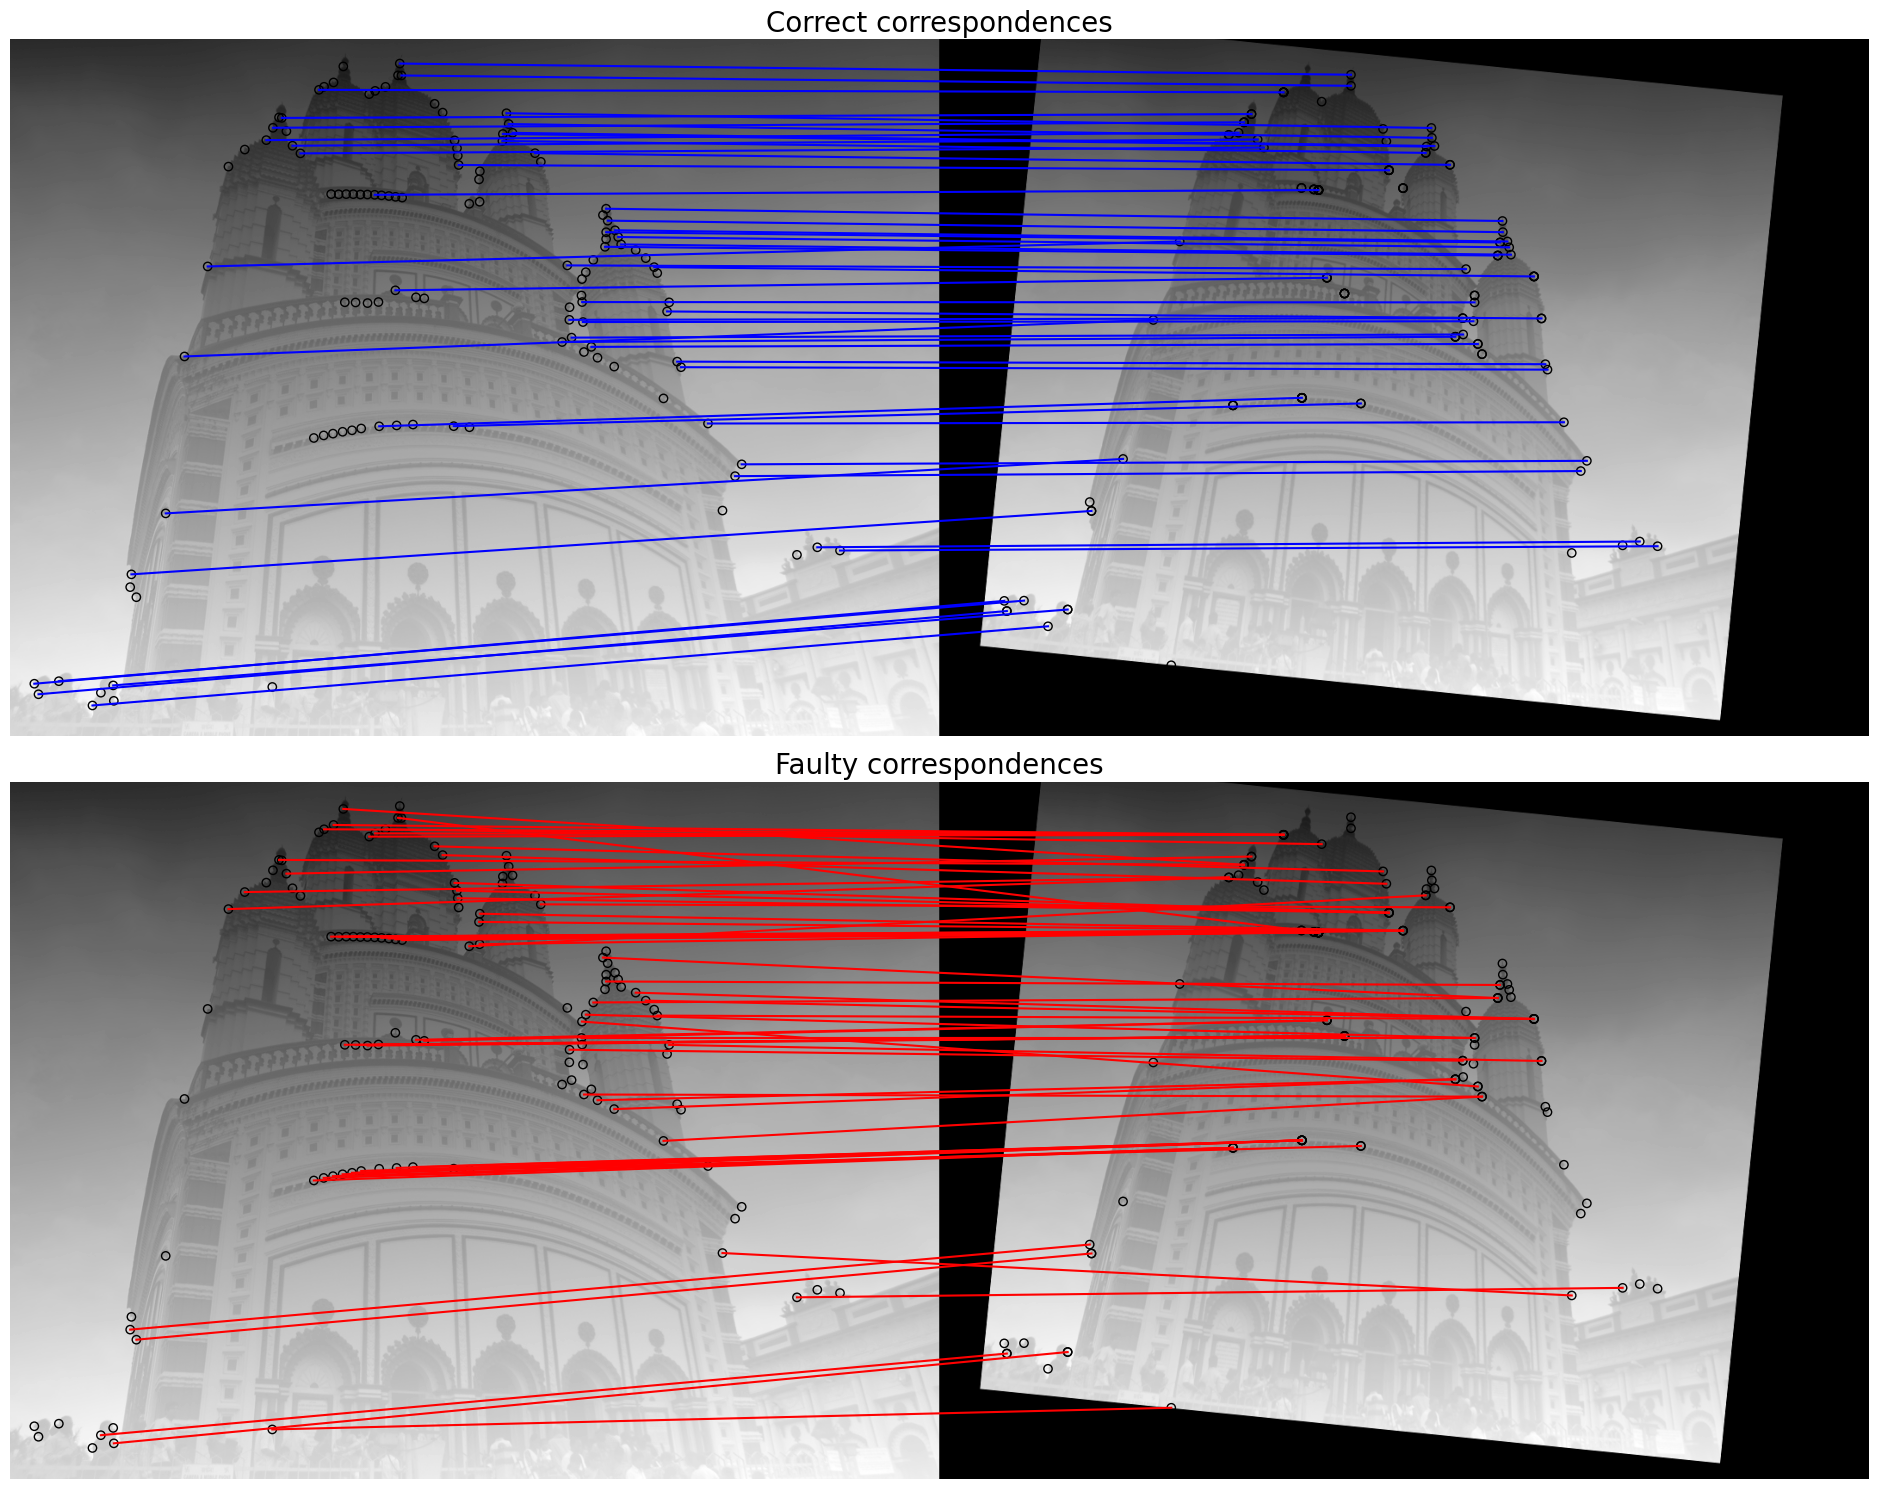

(None, None)

In [16]:
fig, axes = pylab.subplots(nrows=2, ncols=1, figsize=(20,15))
pylab.gray()
inlier_idxs = np.nonzero(inliers)[0]
plot_matches(axes[0], image_original_gray, image_warped_gray, source, destination, np.column_stack((inlier_idxs, inlier_idxs)),matches_color='b')
axes[0].axis('off'), axes[0].set_title('Correct correspondences', size=20)
outlier_idxs = np.nonzero(outliers)[0]
plot_matches(axes[1], image_original_gray, image_warped_gray, source, destination, np.column_stack((outlier_idxs, outlier_idxs)), matches_color='r')
axes[1].axis('off'), axes[1].set_title('Faulty correspondences', size=20)
fig.tight_layout(), pylab.show()

### Brute-force matching with SIFT descriptors and ratio test with OpenCV

3.3.0


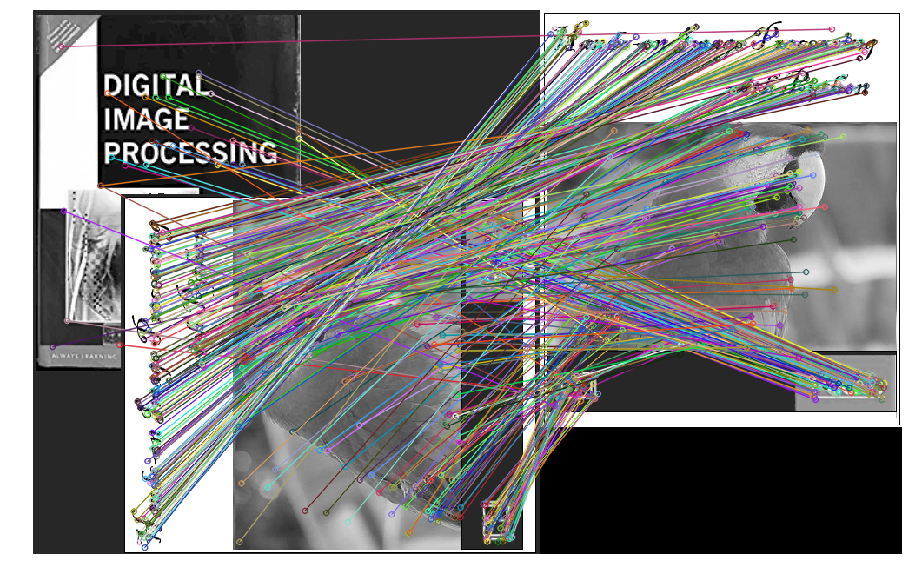

(<matplotlib.figure.Figure at 0x2542c33a7f0>,
 (-0.5, 999.5, 625.5, -0.5),
 None)

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1. Đọc ảnh và chuẩn bị các hình ảnh cần so sánh
# Đọc ảnh đầu vào với chế độ xám (grayscale)
img1 = cv2.imread('../images/books.png', 0)  # queryImage
img2 = cv2.imread('../images/book.png', 0)   # trainImage

# 2. Tạo đối tượng SIFT và tìm keypoints, descriptors
# Tạo đối tượng SIFT để phát hiện các đặc trưng
sift = cv2.SIFT_create()

# Tìm keypoints và descriptors từ các ảnh
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# 3. So khớp các đặc trưng giữa hai ảnh
# Tạo đối tượng BFMatcher để so khớp các descriptors
bf = cv2.BFMatcher()

# Thực hiện khớp knnMatch, tìm 2 match gần nhất cho mỗi descriptor
matches = bf.knnMatch(des1, des2, k=2)

# Áp dụng tỷ lệ kiểm tra (ratio test) để lọc các match tốt
good_matches = []
for m1, m2 in matches:
    if m1.distance < 0.75 * m2.distance:
        good_matches.append([m1])

# 4. Hiển thị kết quả
# Vẽ các điểm khớp (matches) lên ảnh
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=2)

# Chuyển ảnh từ BGR (OpenCV) sang RGB (Matplotlib)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh kết quả với Matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(img3_rgb)  # Hiển thị ảnh
plt.axis('off')  # Tắt trục
plt.title("Keypoint Matches", fontsize=20)  # Tiêu đề với kích thước chữ lớn hơn
plt.show()